# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import scripts.load_data as ld
import scripts.data_analysis as da
import scripts.visualizations as vis

## Zadanie 1

#### Wczytanie metadanych

In [65]:
metadata = ld.read_metadata()

In [66]:
# Słowniki mapujące stare kody na nowe i kody stacji na miast
old_to_new_code, code_to_city = ld.get_code_mappings(metadata)
old_to_new_code

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga': 'KpBydFieldor',
 'KpBydBerling': 'KpB

In [67]:
code_to_city

{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

### Pobranie i preprocessing danych

In [68]:
dfs = []
chosen_years = [2014, 2019, 2024]
for year in chosen_years:
    df = ld.download_and_preprocess_data(year, code_to_city, old_to_new_code, header_index=1 if year != 2014 else 0)
    dfs.append(df)

/usr/lib/python3/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Sanity checks

In [69]:
for df, year in zip(dfs, chosen_years):
    print(f'{year}')
    print(
        f'Liczba dni: {df['Data'].dt.date.nunique()}'
    )
    print(f'Min: {df['Data'].min()}')
    print(f'Max: {df['Data'].max()}')
    print(f'Liczba kolumn: {len(df.columns)}')

2014
Liczba dni: 365
Min: 2014-01-01 01:00:00
Max: 2014-12-31 23:59:59
Liczba kolumn: 38
2019
Liczba dni: 365
Min: 2019-01-01 01:00:00
Max: 2019-12-31 23:59:59
Liczba kolumn: 66
2024
Liczba dni: 366
Min: 2024-01-01 01:00:00
Max: 2024-12-31 23:59:59
Liczba kolumn: 99


In [70]:
# Wybieramy tylko stacje wspólne dla wszystkich lat
# stations = ld.get_common_stations(dfs)
# stations

In [71]:
# Złączenie danych z trzech lat
df, stations = ld.join_data_on_common_stations(dfs)

In [72]:
data_path = 'data/pm25_gios_2014_2019_2024.csv'
df.to_csv(data_path, index=False)

In [73]:
# Kod do wczytywania danych z pliku
df = ld.read_data_from_csv(data_path)
df.head(5)

Miejscowość                 Data      Wrocław    Bydgoszcz         Łódź  \
Kod stacji                       DsWrocAlWisn KpBydPlPozna LdLodzCzerni   
0            2014-01-01 01:00:00        152.0   116.214424    81.029259   
1            2014-01-01 02:00:00        137.0          NaN   210.364670   
2            2014-01-01 03:00:00        129.0          NaN    66.425789   
3            2014-01-01 04:00:00        129.0          NaN    53.999668   
4            2014-01-01 05:00:00        105.0          NaN    52.239670   

Miejscowość       Zgierz Zielona Góra       Kraków                 Legionowo  \
Kod stacji  LdZgieMielcz LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
0             119.696114          NaN        104.0         64.0        44.44   
1              70.337502          NaN        104.0         63.0       103.07   
2              40.915695          NaN         91.0         62.0        74.91   
3              37.817917          NaN         89.0         58.0        39.27   
4              38.814861          NaN         83.0         55.0        26.51   

Miejscowość        Płock  ...     Przemyśl       Gdańsk     Katowice  \
Kod stacji  MzPlocMiReja  ... PkPrzemGrunw PmGdaLeczkow SlKatoKossut   
0                    NaN  ...       48.175         58.4        104.0   
1                    NaN  ...       33.747         28.5        107.0   
2                    NaN  ...       30.622         27.0        114.0   
3                    NaN  ...       28.642         28.7        108.0   
4                    NaN  ...       27.781         25.7         88.0   

Miejscowość  Złoty Potok      Olsztyn       Kalisz     Szczecin               \
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud   
0                   32.0    84.121582          NaN     105.4890        109.0   
1                   39.0    75.444382         82.5     149.7970        118.0   
2                   43.0    34.427513         83.0      86.9602        120.0   
3                   42.0    32.742474         73.1      74.8762        104.0   
4                   40.0    32.714367         74.9      61.9866         96.0   

Miejscowość   Rok Miesiąc  
Kod stacji                 
0            2014       1  
1            2014       1  
2            2014       1  
3            2014       1  
4            2014       1  

[5 rows x 26 columns]

## Zadanie 2
#### Średnie miesięczne + trend dla miast


In [74]:
monthly_means = da.get_monthly_means_for_stations(df)

print("Średnie miesięczne dla każdej stacji:")
monthly_means

Średnie miesięczne dla każdej stacji:


Miejscowość              Wrocław    Bydgoszcz         Łódź       Zgierz  \
Kod stacji          DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz   
(Rok, ) (Miesiąc, )                                                       
2014    1              42.797037    30.616434    35.407387    31.518199   
        2              38.649351    51.856173    45.704915    46.359747   
        3              36.125000    40.556041    35.259896    36.861373   
        4              25.353659    19.772776    23.474251    18.767278   
        5              14.963925    11.903410    16.407493    11.068347   
        6              12.160121     9.298433    14.518648     6.742433   
        7              15.945985    13.444708    18.111519     8.013444   
        8              12.982327    11.135863    16.008222     7.298420   
        9              23.489083    20.824928    26.981774    12.637631   
        10             35.526761    34.510773    36.905487    22.638426   
        11             42.607519    36.765969    40.767644    24.943106   
        12             44.335203    21.796060    46.016825    35.692493   
2019    1              30.098849    30.536650    29.802108    47.697331   
        2              31.104852    30.970726    28.895296    44.070254   
        3              19.179600    16.377068    18.958108    31.698762   
        4              21.718586    20.679920    19.223611    22.946328   
        5              13.776702    15.580947    12.780323    14.815451   
        6              12.825616    20.193602    11.119444    14.799107   
        7              11.026030    12.522816     7.969086    10.014388   
        8              11.148639    19.318594     9.345430    14.877493   
        9              12.520820    15.593327    12.358650    19.233645   
        10             20.090519    24.574939    20.396226    33.513850   
        11             23.608889    27.440278    21.362745    29.178063   
        12             23.432526    24.857317    21.565868    35.521680   
2024    1              24.596505    17.465593    19.651556    34.638128   
        2              16.553401    14.689098    15.920893    23.898549   
        3              24.241184    23.096828    21.435484    29.892339   
        4              11.894437    11.310778     9.441337    14.085376   
        5              11.041256    10.873099    10.557143     8.741655   
        6              10.509471     8.961730     9.704167     9.009801   
        7               9.097690     7.758732     7.758681     8.683737   
        8              11.574059     9.209726     9.851478    10.932571   
        9              13.114571    12.913372    13.984844    14.973056   
        10             15.125575    13.104191    16.039838    22.542396   
        11             20.102646    14.332390    20.072308    33.866328   
        12             24.586388    12.487615    21.665680    36.112635   

Miejscowość         Zielona Góra       Kraków                 Legionowo  \
Kod stacji          LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
(Rok, ) (Miesiąc, )                                                       
2014    1              42.946602    60.350806    47.241565    39.815343   
        2              33.748299    86.708955    62.591045    62.753609   
        3              37.276358    54.498652    39.900135    47.863719   
        4              23.778929    34.743300    24.543417    27.777273   
        5              12.545727    19.547718    14.522849    14.622747   
        6              12.422360    21.068056    14.140473    11.403530   
        7              17.189873    20.838710    14.062162    13.315285   
        8              12.459618    17.806452    12.622312    10.916430   
        9              19.722835    34.341246    22.745480    19.867370   
        10             28.407028    58.629032    38.024523    41.550834   
        11             49.757198    70.497222    46.809722    44.292135   
        12             3

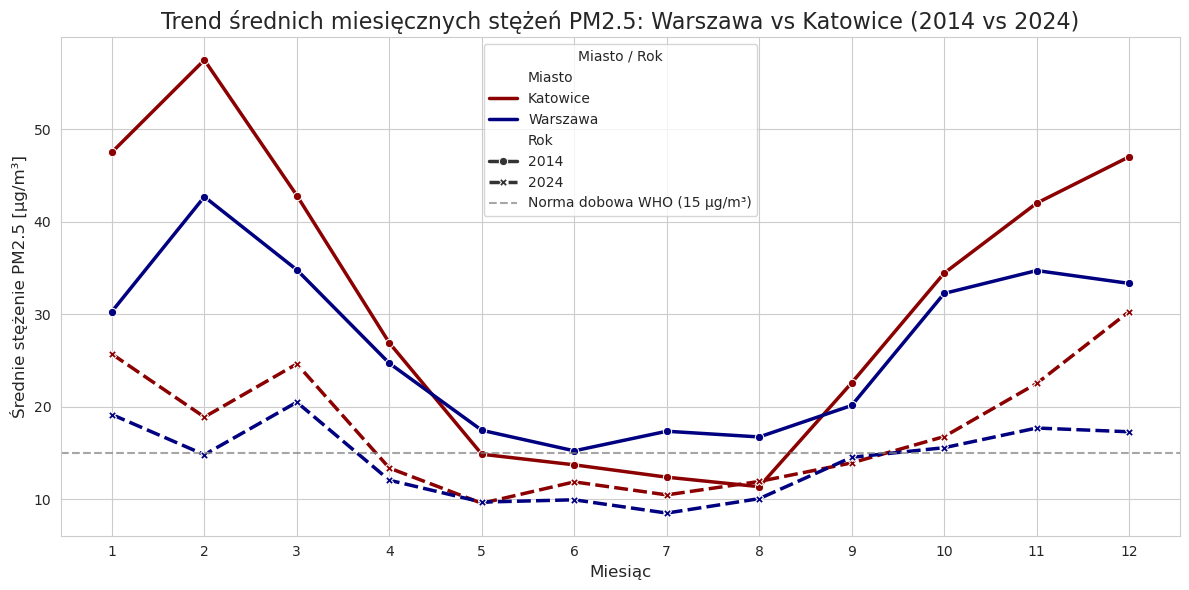

In [76]:
# Wykres trendów dla Katowic i Warszawy w latach 2014 i 2024
chosen_years = [2014, 2024]
chosen_cities = ['Warszawa', 'Katowice']

df_plot = da.get_chosen_monthly_means(df, chosen_years, chosen_cities)
vis.plot_trends_for_chosen_cities(df_plot, chosen_years, chosen_cities)

Wykres przedstawia średnie miesięczne stężenie pyłu PM2.5 dla Warszawy i Katowic, porównując sytuację z roku 2014 (linie przerywane) z rokiem 2024 (linie ciągłe). Dane zostały uśrednione dla wszystkich stacji pomiarowych w obrębie danego miasta.

Wyraźnie widać wysokie stężenia w miesiącach zimowych (styczeń, luty, grudzień) i niskie w letnich. Wskazuje to na kluczową rolę sezonu grzewczego w emisji zanieczyszczeń.

Zarówno w Warszawie, jak i w Katowicach, linie dla roku 2024 znajdują się znacząco niżej niż dla roku 2014 (szczególnie w miesiącach zimowych). Oznacza to znaczną poprawę jakości powietrza w ciągu ostatniej dekady.

Katowice generalnie wykazują wyższe stężenia PM2.5 niż Warszawa, szczególnie w miesiącach zimowych roku 2014, co wynika ze specyfiki regionu i źródeł ogrzewania. Jednak w 2024 roku różnica ta w miesiącach letnich niemal zanika, a w zimowych jest znacznie mniejsza niż dekadę wcześniej.

## Zadanie 3
#### Uśrednienie danych po stacjach w miejscowości i miesiącu w każdym roku

In [77]:
df_means = da.get_monthly_means_for_cities(df)
df_means.head(5)

Miejscowość,Rok,Miesiąc,Bydgoszcz,Gdańsk,Kalisz,Katowice,Kraków,Kędzierzyn-Koźle,Legionowo,Olsztyn,...,Radom,Siedlce,Szczecin,Warszawa,Wrocław,Zgierz,Zielona Góra,Złoty Potok,Łódź,Żyrardów
0,2014,1,30.616434,15.574259,42.099015,47.531587,53.805108,42.847025,39.815343,25.550652,...,40.485457,30.710269,30.648653,30.108373,42.797037,31.518199,42.946602,25.105590,35.407387,36.824947
1,2014,2,51.856173,25.712251,52.429559,57.502297,74.578125,43.510433,62.753609,40.799969,...,53.218289,47.344554,27.378568,42.801541,38.649351,46.359747,33.748299,32.390863,45.704915,55.307686
2,2014,3,40.556041,15.098253,53.279132,42.855405,47.188844,45.567347,47.863719,24.921921,...,43.391626,40.910263,30.315625,34.825151,36.125000,36.861373,37.276358,21.564371,35.259896,45.742247
3,2014,4,19.772776,13.423333,32.493501,26.925608,29.664583,29.082759,27.777273,17.748875,...,27.699527,25.200014,19.254632,24.765423,25.353659,18.767278,23.778929,14.539735,23.474251,26.113754
4,2014,5,11.903410,10.499194,17.961618,14.893387,16.926075,16.551867,14.622747,13.588730,...,14.581354,13.727911,11.616565,17.449219,14.963925,11.068347,12.545727,8.812585,16.407493,14.187658


#### Heatmapy średnich miesięcznych

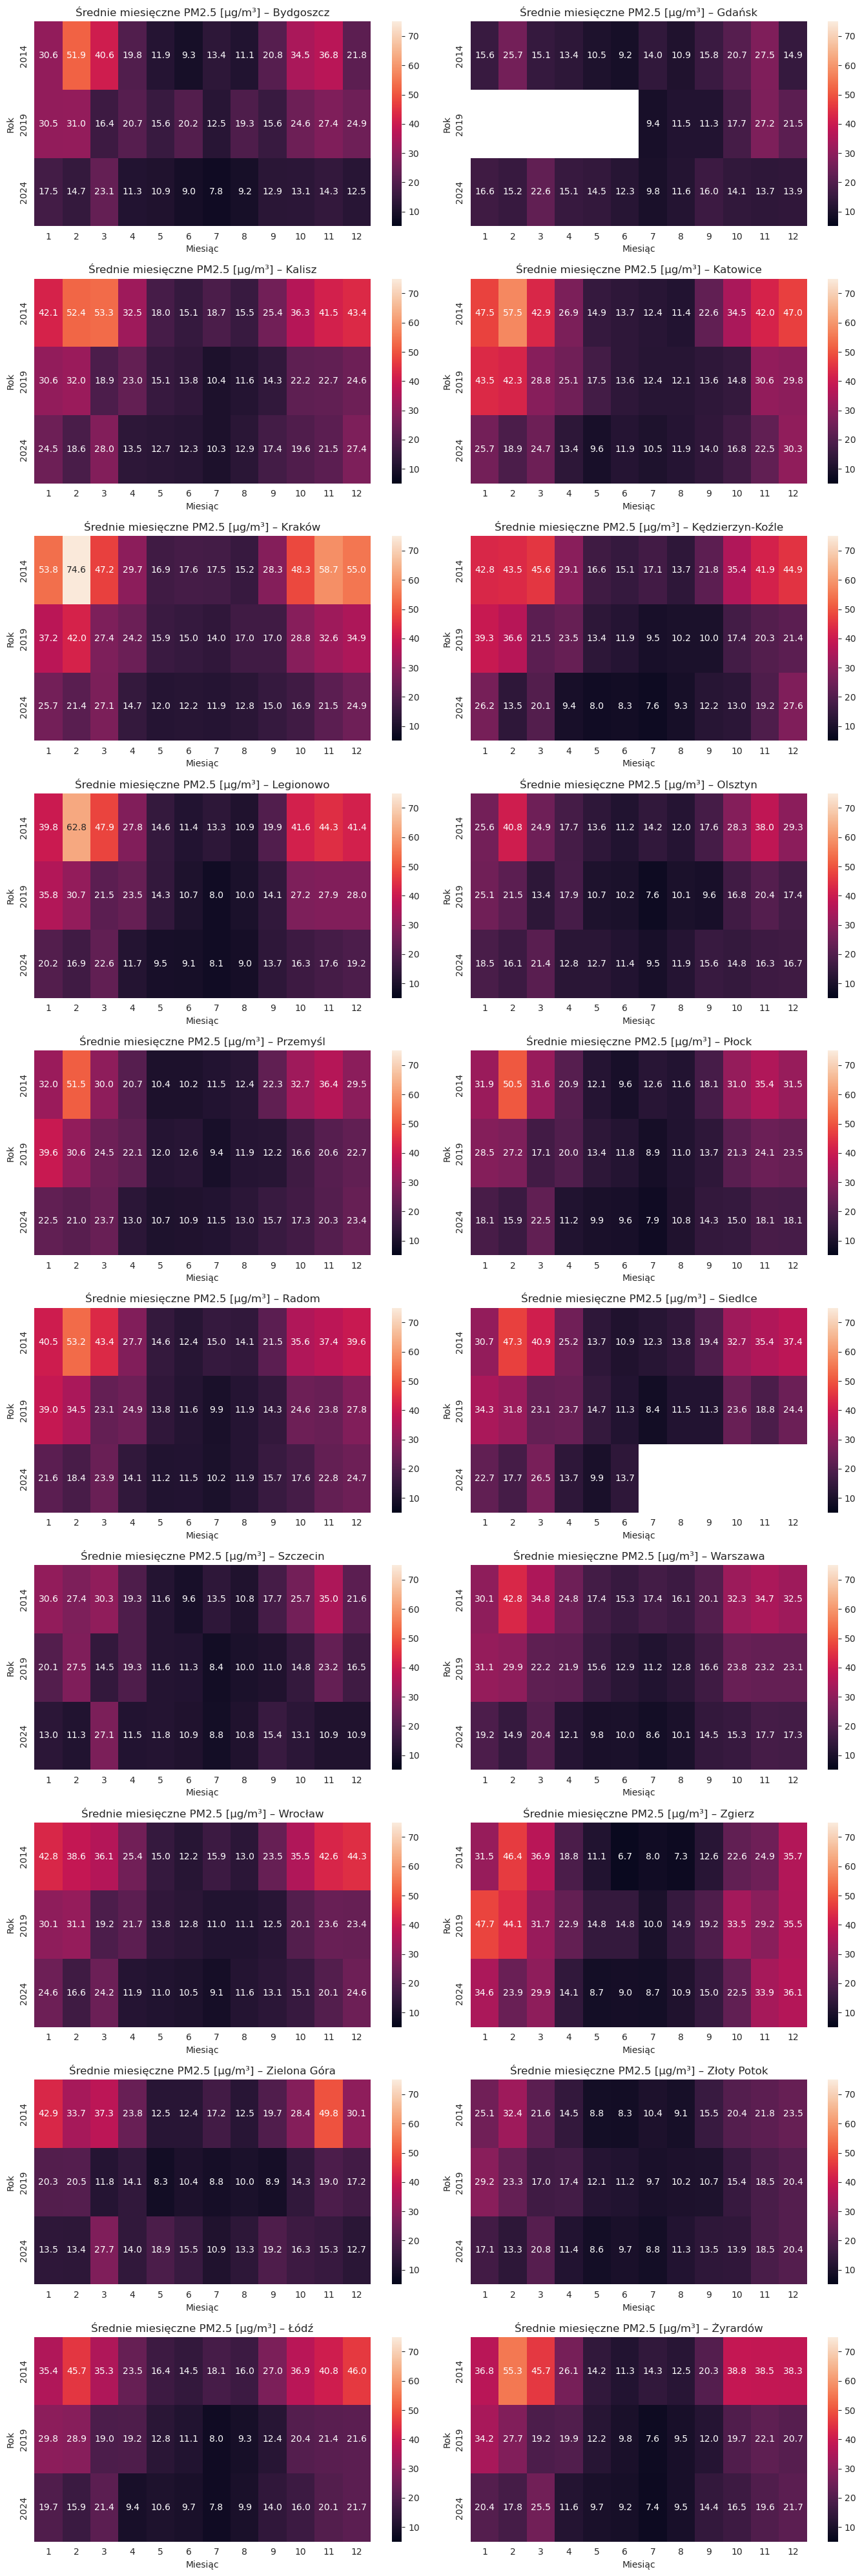

In [78]:
vis.plot_heatmaps_for_cities(df_means)

Patrząc na powyższe wykresy, możemy zauważyć podobny trend we wszystkich raportowanych miastach, a mianowicie najwyższe stężenia drobnego pyłu w sezonie grzewczym, przede wszystkim w lutym i listopadzie/grudniu. Nie jest to zaskakujące, jako że jednym z głównych żródeł PM2.5 w Polsce jest spalanie paliw stałych w domowych piecach i kotłach [[Polski Alarm Smogowy](https://polskialarmsmogowy.pl/smog/skad-sie-bierze-smog/)]. 

Widzimy jednak obiecującą tendecję, jaką jest znaczne obniżenie stężenia PM2.5 w każdym z miast na przeciągu lat 2014-2024. W 2014 roku w każdym z przedstawionych miast zaobserwowane było kilkukrotne – od około dwukrotnego w Gdańsku do pięciokrotnego w Krakowie – przekroczenie dopuszczalnego przez WHO stężenia 15 µg/m³. W 2024 roku, ta wartość nadal była przekraczana w każdym z miast, jendak maksymalne średnie miesięczne stężenie w tym roku wahało się pomiędzy 20.4 (Warszawa) a 36.1 µg/m³ (Zgierz – miasto, w którym poprawa jest najmniejsza). Pokazuje to, że wdrożenie działania antysmogowe wdrażane w ostatniej dekadzie przynoszą realne efekty.

## Zadanie 4
#### Dni z przekroczeniem normy (WHO)

In [79]:
yearly_counts = da.get_who_norm_exceeding_days(df)
selected_stations = da.get_max_and_min_k_stations(yearly_counts, chosen_year=2024, k=3)

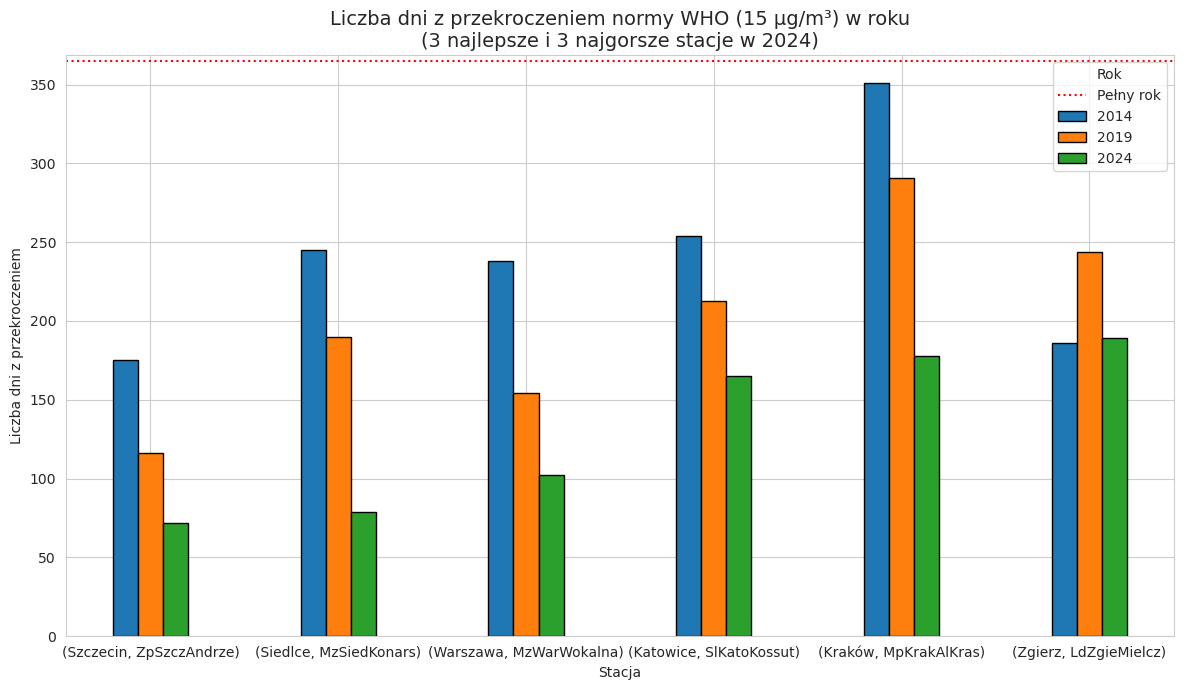

Tabela z wynikami:


('Data', '')                   2014  2019  2024
Miejscowość      Kod stacji                    
Wrocław          DsWrocAlWisn   255   180   134
Bydgoszcz        KpBydPlPozna   218   218   108
Łódź             LdLodzCzerni   285   183   128
Zgierz           LdZgieMielcz   186   244   189
Zielona Góra     LuZielKrotka   218   108   145
Kraków           MpKrakAlKras   351   291   178
                 MpKrakBulwar   264   203   152
Legionowo        MzLegZegrzyn   250   207   121
Płock            MzPlocMiReja   219   188   131
Radom            MzRadTochter   272   211   161
Siedlce          MzSiedKonars   245   190    79
Warszawa         MzWarAlNiepo   305   299   152
                 MzWarWokalna   238   154   102
Żyrardów         MzZyraRoosev   256   170   142
Kędzierzyn-Koźle OpKKozBSmial   259   174   111
Przemyśl         PkPrzemGrunw   220   182   146
Gdańsk           PmGdaLeczkow   159    71   139
Katowice         SlKatoKossut   254   213   165
Złoty Potok      SlZlotPotLes   173   143   117
Olsztyn          WmOlsPuszkin   224   136   139
Kalisz           WpKaliSawick   292   200   163
Szczecin         ZpSzczAndrze   175   116    72
                 ZpSzczPilsud   213   163   130

In [80]:
vis.plot_who_exceeding_days(selected_stations)

print("Tabela z wynikami:")
display(yearly_counts[[2014, 2019, 2024]])

Analizując wykres przedstawiający liczbę dni z przekroczeniem normy WHO (15 µg/m³) w 3 najlepszych i 3 najgorszych stacjach, można zaobserwować dominującą tendencję malejącą w zanieczyszczeniu powietrza na przestrzeni lat 2014, 2019 i 2024. 

Największą bezwzględną poprawę, mierzoną największym spadkiem liczby dni z przekroczeniami, zanotowały stacje o najgorszej jakości powietrza (Kraków, Katowice), gdzie w 2014 roku przekroczenia sięgały odpowiednio 350 i 255 dni. Mimo ogólnej poprawy, w 2024 roku wciąż utrzymują się znaczące dysproporcje, ponieważ stacje w Krakowie, Zgierzu i Katowicach (jako najgorsze) nadal notują ponad 170 dni z przekroczeniem normy, co stanowi prawie połowę roku. 

Z drugiej strony, stacje najlepsze, takie jak Szczecin, osiągnęły duży sukces, redukując liczbę dni smogowych w 2024 roku do około 70, w porównaniu do ponad 175 dni w 2014. Kontrast pomiędzy stacjami o najlepszej i najgorszej jakości powietrza w 2024 roku (np. Szczecin vs. Kraków) wyraźnie wskazuje na potrzebę skupienia interwencji w najbardziej zanieczyszczonych lokalizacjach.